In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import polyphase
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

Computation took 5.59s


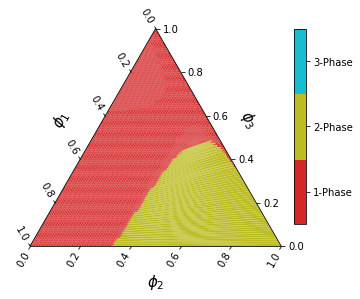

In [5]:
M, chi = polyphase.get_sample_data(1)
f = lambda x: polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f, 100, 3)
engine.compute(correction=3, lower_hull_method='point_at_infinity')
engine.plot()

In [29]:
# plotly convex hull triangulation
methods = [None, 'point_at_infinity','negative_znorm']
subplots = make_subplots(rows=1, cols=3, 
                         specs=[[{'type':'scene'},{'type':'scene'},{'type':'scene'}]],
                         subplot_titles=methods
                        )
corrections = [1,3,3]
scenes = ['scene','scene2','scene3']
#M, chi = polyphase.get_sample_data(1)
M = [406.193,5.99,1]
chi = [0.435,0.77,1.00]

for i in range(3):
    f = lambda x : polyphase.flory_huggins(x, M, chi)
    engine = polyphase.PHASE(f,100,len(M))
    engine.compute(correction=corrections[i], lower_hull_method=methods[i])
    phase3 = engine.simplices[np.asarray(engine.num_comps)==3]
    colors = ['white']*len(engine.simplices[~engine.coplanar])
    CH = ff.create_trisurf(x=engine.grid[0,:], y=engine.grid[1,:],
                            z=engine.energy,
                            simplices=engine.simplices[~engine.coplanar],
                            title= methods[i], show_colorbar=False,
                            color_func = colors
                           )
    subplots.add_trace(CH['data'][0], row=1,col=i+1)
    subplots.add_trace(CH['data'][1], row=1,col=i+1)
    subplots['layout'][scenes[i]].update(
        dict(xaxis_title='phi_1',yaxis_title='phi_2',
             zaxis_title='Energy', aspectmode='cube')
    )
subplots.write_html('../figures/notebooks/1.html')

Computation took 1.38s
Computation took 1.26s
Computation took 1.29s
